Notes
-----

In [1]:
#temporal correlation/
#serial correlation
#autocorrelation
#Consecutive elements in a time series exhibit some correlated characteristics
#identify the structure of these correlations in order to understand how to simulate as well as how to predict

In [2]:
#Expection
#expected value of a random variable x is the mean average in the population

In [3]:
#variance
#defined by the square of individual observations and their difference from the mean value x

#standard deviation is the the square root of variance of x

In [4]:
#covariance 
#the variance between between two variables

#cov(x,y) = variance(x)*variance(y)

#covariance is dimensionless so we prefer to look at correlation

#correlation is between -1 and 1 so we can understand how two variables interact with each other
#cor(x,y) = cov(x,y)/(sqrt(variance(x))*sqrt(variance(y))



# Stationarity in Time Series

In [ ]:
#stationarity in mean and variance

#for a given time series we only have one observation of history
#if we want to understand the 'true' model under the phenomena we can 'decompose' the time series
    #'Decompose': remove the deterministic and seasonal components of the time series
    #the residual series is the the core representation of the data, this is like singular value decomposition in linalg
    #With these features removed we can make the assumption of mean stationarity

#stationarity in variance
    #we likewaise assume that variance is is a constant and not a function of time

#These assumptions can break down in high-frequency trading scenarios since the time horizon is so short we 
#cannot conclude that the are not necessarily temporally correlated

# Serial Correlation

In [1]:
#We wish to know how sequential observations in a time series affect one another

#if correlation is only a function of the lag then we can say a series in Second Order stationary
    #if we have these two conditions 
        #Stationary in Mean
        #Stationary in variance
    

#if a series is second order stationary than its autocovariance at lag, k is a function of C_k = E[(x_t - u)(x_t+k -u)]

In [2]:
#Correlogram
#plots the autocorrelation for sequential values of lag k -> n
#allows us to see correlation structure for each lag
#we want to detect andy autocorrelations after removing deterministic trends or seasonal affects

In [ ]:
#Basis for trading strategy
    #understanding the direction of an asset movement
    #understanding volatility to have a risk-management strategy

########################
#1. Outline a hypothesis about a time-series and its behavior
#2. Construct the correlogram with R and asses its serial correlation
#3. Fit model that reduces serial correlation in the residuals
#4. Refine model until no correlation is present and then use a statistical test to assess goodness of fit
#5. Iterate until a desired level of forecast accuracy is obtained 
#6. Take the forecast and construct a trading strategy



## White noise and Random Walks

In [ ]:
#Backward Shift Operator (or lag operator)
 # takes a time series element as an argument and returns the element one time unit previously
 #repeated application of the operator allows us to step back n times


#Difference Operator
    #For series that are not stationary, we use a differencer to produce a stationary series
    #Takes a time series element as an argument and returns the difference between the element and one 
    #that of one time unit previous

In [3]:
#White Noise Models

#Very useful in generating synthetic and reaslistic data

#Residual Error Series
    #Series of the difference between predicted and observed values
    #if model can explain the serial correlations in the observations
    #then the error termsl residualas, are serially uncorrelated
    #each element of the serially correlated residual series is Independent and Identically distributed

    
#If we are going to make the create time series models that explain away the serial correlation of time-series 
#we should be able to generate independent random variables from some distribution.

#Discrete White Noise
    #elements of series are I.i.d
    #mean of 0, var of sigma^2
    #no serial correlation

    #DWN is a model for the residuals

    #When we are trying to fit other models to our time series 
    #we use DWN as a validation check to confirm that we have removed serial correlation from residuals 
    #and thus we have a good fit

#If elements of series are drawn from a guassian distribution we have Guassian White Noise

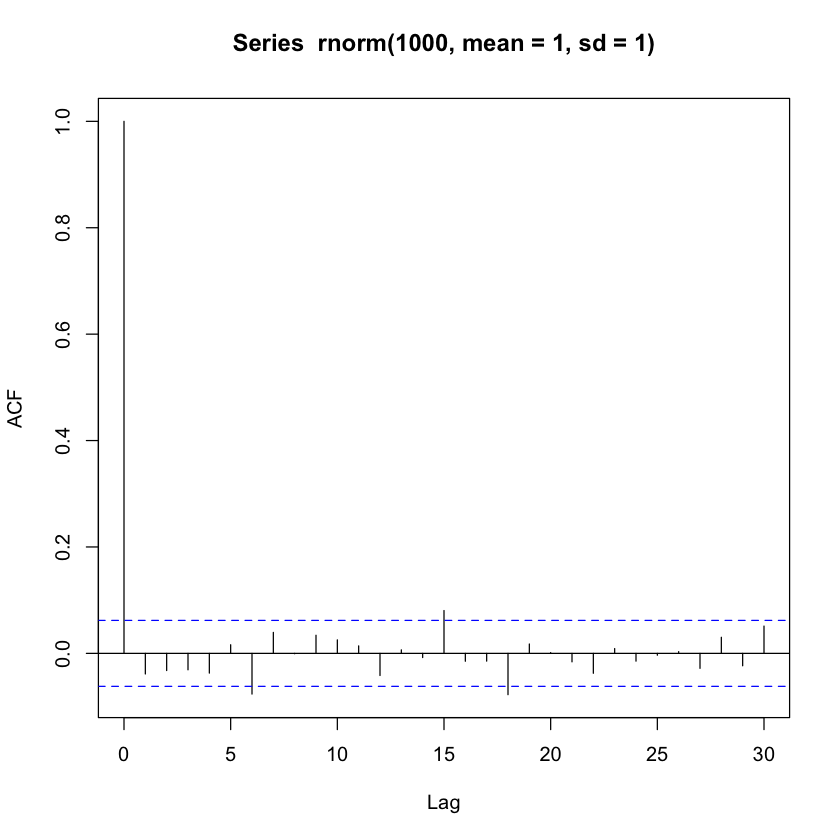

In [7]:
#generating white noise data in R
#rnorm draws randomly from the normal distribution
set.seed(1)
acf(rnorm(1000, mean=1, sd=1))

## Random Walk Series

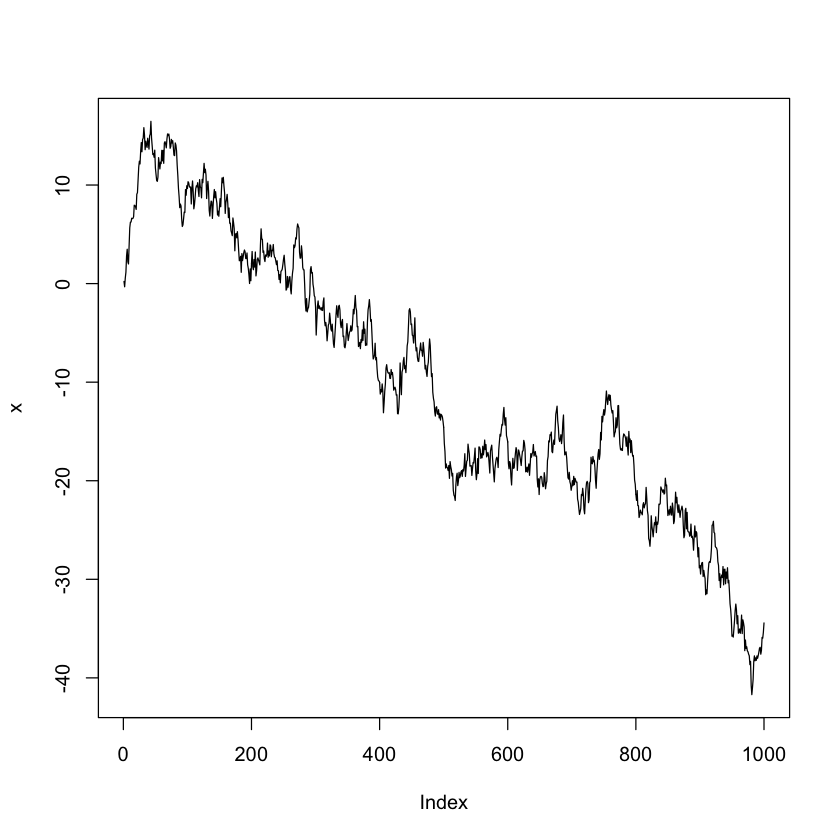

In [24]:
#time series model where the current observation is equal to the previous observation with a random step up or down

#x_t = x_t_1 + w_t where w_t is a discrete white noise series

#RWS is the sum of the elements from a discrete white noise series

#Second Order Properties
#Random walk is not stationary in its variance since variance is time dependent
#as time increases so does the variance 

#For long time series,with short-term lags, we get an autocorrelation ~=1

set.seed(4)
x <- w <- rnorm(1000)

for (t in 2:1000) x[t] <- x[t -1] + w[t]
    
plot(x, type='l')

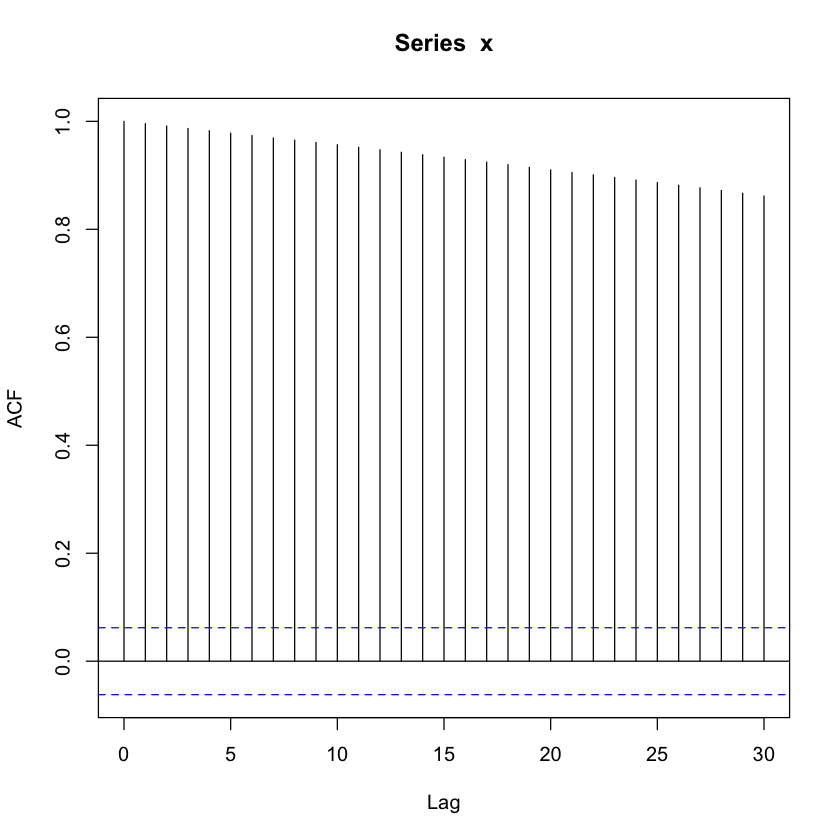

In [22]:
acf(x)

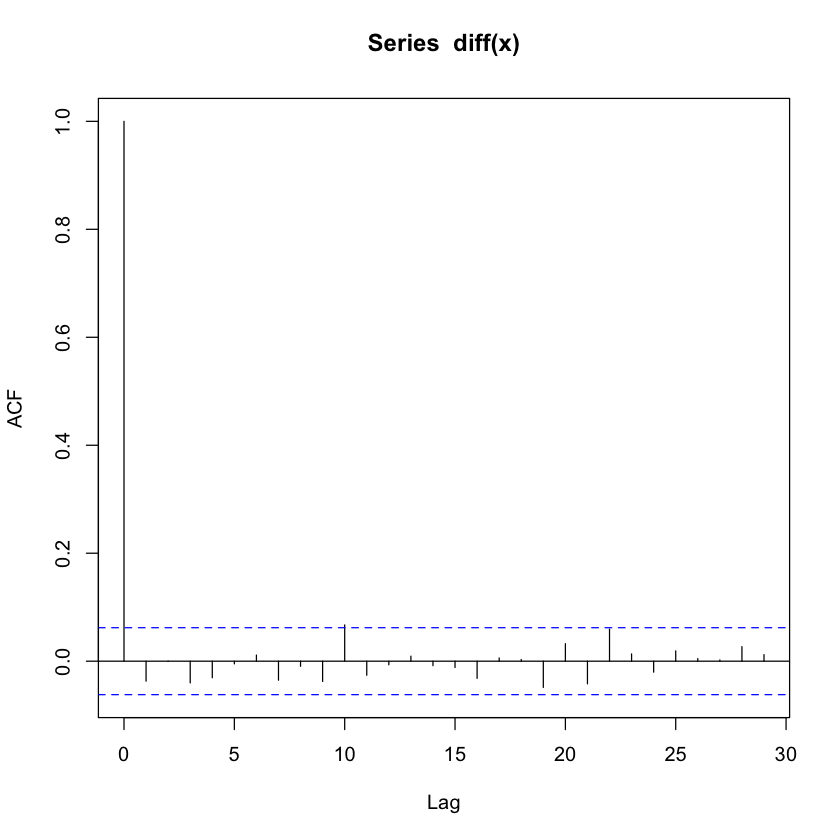

In [26]:
#How to determine if our application of a random walk model to the time series is appropriate 'fit'/'guess' for the model

#we can calculate the difference between observations of the time series and 
#see if the equal some draw from a discretw white noise distribution

acf(diff(x))

In [34]:
#let's look at real data
require('quantmod')
getSymbols('TSLA', source='yahoo')
tail(TSLA)

[1] "TSLA"

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2017-12-21    329.59    333.74   327.21     331.66     4385200        331.66
2017-12-22    329.51    330.92   324.82     325.20     4215800        325.20
2017-12-26    323.83    323.94   316.58     317.29     4378400        317.29
2017-12-27    316.00    317.68   310.75     311.64     4712100        311.64
2017-12-28    311.75    315.82   309.54     315.36     4316300        315.36
2017-12-29    316.18    316.41   310.00     311.35     3762800        311.35

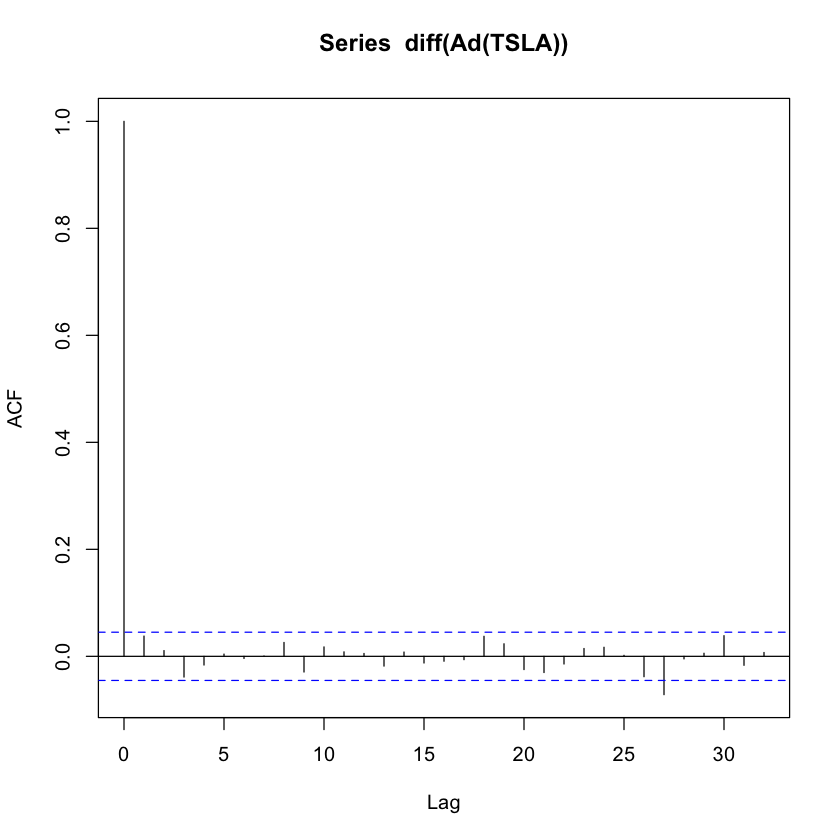

In [35]:
#Now to evaluate whether or not Tesla's stock price can be modeled 
#as a random walk we can take the difference of the series

acf(diff(Ad(TSLA)), na.action = na.omit)

[1] "GSPC"

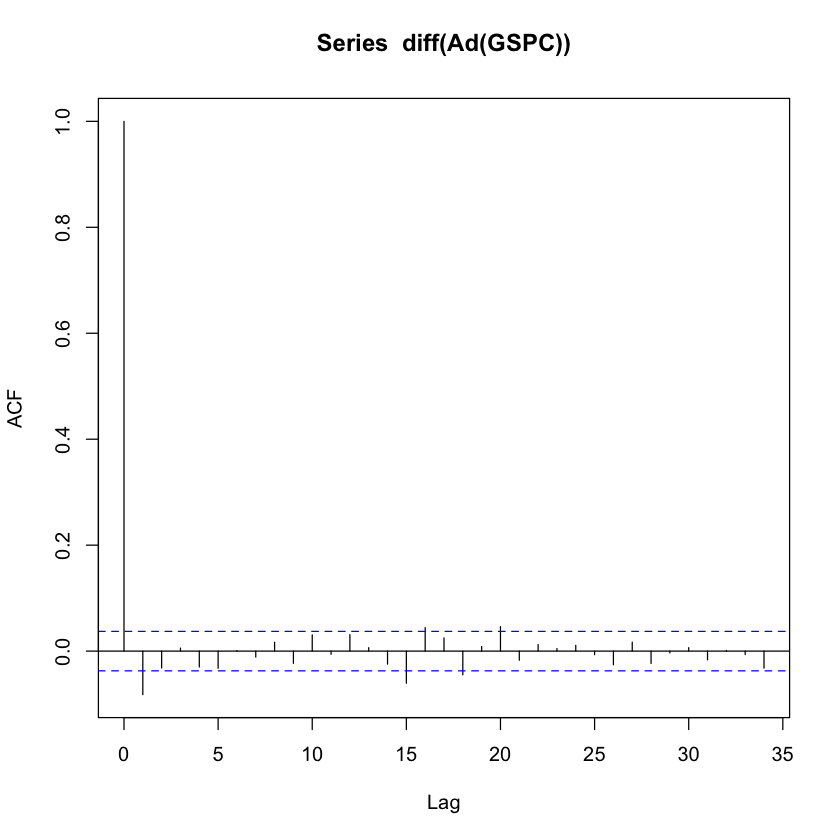

In [36]:
getSymbols('^GSPC', src='yahoo')
acf(diff(Ad(GSPC)), na.action=na.omit)

In [ ]:
#We can make a case that Tesla's stock price follows a random walk model
#However, given that SP500 has a number of values that cross the 5% threshold its harder to make that case